<Center>Submitted by - Sumit Suman</center>
 <Center>Roll No - 241561552</Center>
 <center>Email Id - sumitsuman24@iitk.ac.in</center>

## <b><font color="red">Task 1 : Identify the attributes, their types, distinct values, and range.</font></b>

1. We are looking into a dataset which decsribes the data churn for customers in a Bank.
2. We will begin with importing the libraries in our notebook and followed by importing the dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import itertools
import sqlite3

In [5]:
file_path = '/Users/sumitsuman/Library/CloudStorage/GoogleDrive-sumitsuman.iifm@gmail.com/My Drive/IITK/Term-1/Data Mining Tools & Techniques /Assignment_1/Telco-Customer-Churn__1_.csv'

df = pd.read_csv(file_path)

## <b><font color = "teal">Intial Exploration</font></b>

* To initiate the process, first we want to check the basic outlay of the data using head() and tail() function.

In [7]:
# Display the first few rows of the dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [8]:
# Display the last few rows of the dataset
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

#### <b><font color ="blue">We can infer the following by observing the attributes.</font></b>
1. The dataset has 21 attributes and 7042 data objects.
2. <font color ="teal">customerID</font> is a primary key for the data base.
3. Most of the columns looks like a categorical data type except <font color ="teal">tenure</font>, <font color ="teal">MonthlyCharges</font> and <font color ="teal">TotalCharges</font> which appears to be of numerical data type.

#### <b><font color ="blue">Lets investigate the database further to check the datatypes of the attributes.</font></b>

In [10]:
# Display the data types of all the attributes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### <font color ="Green">Distinct Values (Before Data Cleaning)</font>

In [12]:
# Get unique values for each attribute
unique_values = {col: df[col].unique() for col in df.columns}

print("Unique values for each attribute:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

Unique values for each attribute:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed

#### <b><font color ="blue">By properly studying the data types of each attribute and the possible unique values, we can make the following conclusions.</font></b>
1. <font color ="teal">customerID</font> is a primary key for the data base.
2. <font color ="teal">SeniorCitizen</font> is int64 datatype which needs to be converted to Boolean data type.
3. <font color ="teal">Partner</font>, <font color ="teal">Dependents</font>, <font color ="teal">PhoneService</font>, <font color ="teal">PaperlessBilling</font>, and <font color ="teal">Churn</font> has Yes and No values which corrsponds to a categorical (Boolean) data type.
4. <font color ="teal">TotalCharges</font> needs to be converted to float64 data type.

## <b><font color = "teal">Data Cleaning</font></b>

1. Lets try to convert the data type of the attributes.
2. The <font color = "Red">Yes</font> has been converted to <font color = "Red">True</font> and <font color = "Red">No</font> has been converted to <font color = "Red">False</font>.

In [15]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values (if any) or drop them
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Convert the 'SeniorCitizen' column to boolean
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

## <font color = "Red">First part of the task is to identify the attributes, their types, distinct values, and range.</font>

### <font color ="Green">Attributes and their data types</font>

In [17]:
# Display the data types of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### <font color ="Green">Distinct Values (After Data Cleaning)</font>

In [19]:
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# create a dictionary to store the results
results = {}

# loop through each variable
for variable in variables:
    # count the values of the options
    counts = df[variable].value_counts()
    
    # create a DataFrame from the counts
    counts_df = pd.DataFrame({'Option': counts.index, 'Count': counts.values})
    
    # add the results to the dictionary
    results[variable] = counts_df

# create a multi-index DataFrame to store the results
multi_index_df = pd.concat(results, axis=0, keys=variables)

# print the result in a tabular form
print(multi_index_df)

                                       Option  Count
gender           0                       Male   3555
                 1                     Female   3488
SeniorCitizen    0                      False   5901
                 1                       True   1142
Partner          0                         No   3641
                 1                        Yes   3402
Dependents       0                         No   4933
                 1                        Yes   2110
PhoneService     0                        Yes   6361
                 1                         No    682
MultipleLines    0                         No   3390
                 1                        Yes   2971
                 2           No phone service    682
InternetService  0                Fiber optic   3096
                 1                        DSL   2421
                 2                         No   1526
OnlineSecurity   0                         No   3498
                 1                        Yes 

### <font color ="Green">Range</font>

##### Range can be calculated for the 3 numerical variables.

In [21]:
# Calculating the range for numerical columns
range_tenure = df['tenure'].max() - df['tenure'].min()
range_monthly_charges = df['MonthlyCharges'].max() - df['MonthlyCharges'].min()
range_total_charges = df['TotalCharges'].max() - df['TotalCharges'].min()

# Printing the results
print(f"Range of tenure: {range_tenure}")
print(f"Range of MonthlyCharges: {range_monthly_charges}")
print(f"Range of TotalCharges: {range_total_charges}")

Range of tenure: 72
Range of MonthlyCharges: 100.5
Range of TotalCharges: 8666.0


### <font color ="Green">Statistical Summary</font>

In [23]:
# Statistical summary of numerical columns
df.describe().round(2)

tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7043.00
mean     32.37           64.76       2283.30
std      24.56           30.09       2265.00
min       0.00           18.25         18.80
25%       9.00           35.50        402.22
50%      29.00           70.35       1400.55
75%      55.00           89.85       3786.60
max      72.00          118.75       8684.80

## <font color = "Red">Task 2 : Create the plots and charts discussed in Chapter 2 (boxplot, histogram, scatter plot, QQ plot, etc.) for different attributes.</font>

## <b><font color = "teal">Boxplot</font></b>

##### <font color ="blue">Boxplot mainly incorporates five-number summary which includes Minimum, Q1, Median, Q3 and Maximum values of distribution of a numerical variable.</font>

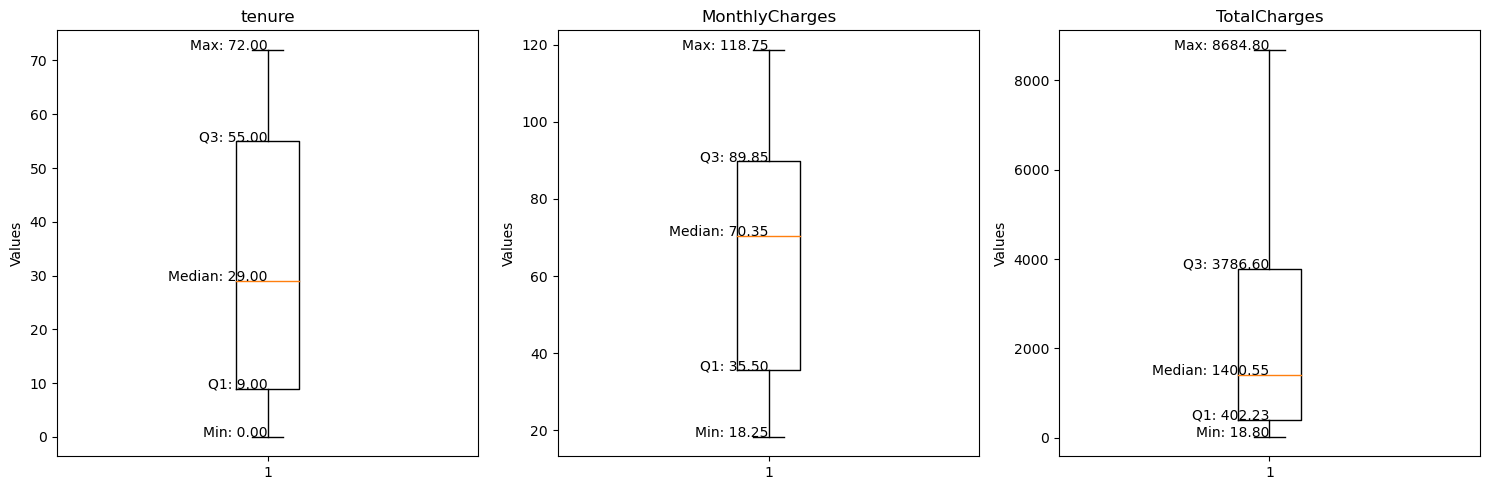

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    axs[i].boxplot([df[var]])
    axs[i].set_title(var)
    axs[i].set_ylabel('Values')
    
    # Calculate the five number summary
    min_val = df[var].min()
    q1 = df[var].quantile(0.25)
    med = df[var].median()
    q3 = df[var].quantile(0.75)
    max_val = df[var].max()
    
    # Annotate the five number summary
    axs[i].annotate(f'Min: {min_val:.2f}', xy=(1, min_val), xytext=(1, min_val), ha='right')
    axs[i].annotate(f'Q1: {q1:.2f}', xy=(1, q1), xytext=(1, q1), ha='right')
    axs[i].annotate(f'Median: {med:.2f}', xy=(1, med), xytext=(1, med), ha='right')
    axs[i].annotate(f'Q3: {q3:.2f}', xy=(1, q3), xytext=(1, q3), ha='right')
    axs[i].annotate(f'Max: {max_val:.2f}', xy=(1, max_val), xytext=(1, max_val), ha='right')

plt.tight_layout()
plt.show()

## <b><font color = "teal">Bar Graph</font></b>

##### <font color ="blue">Lets aggregate the total number of data objects based on various categorical variable.</font>
##### This will also help us verify the distinct values of all the categorical variables.

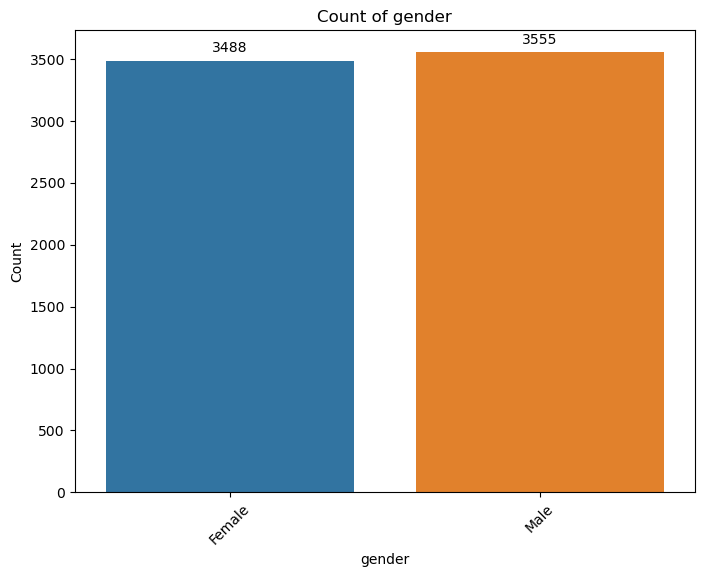

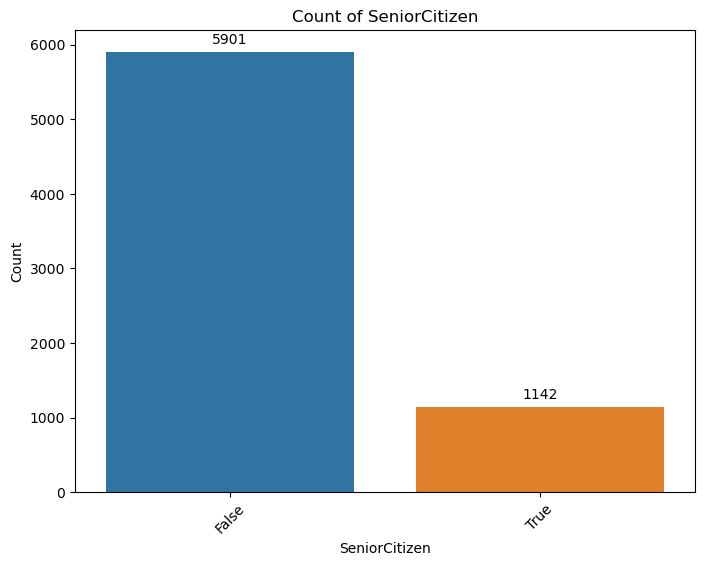

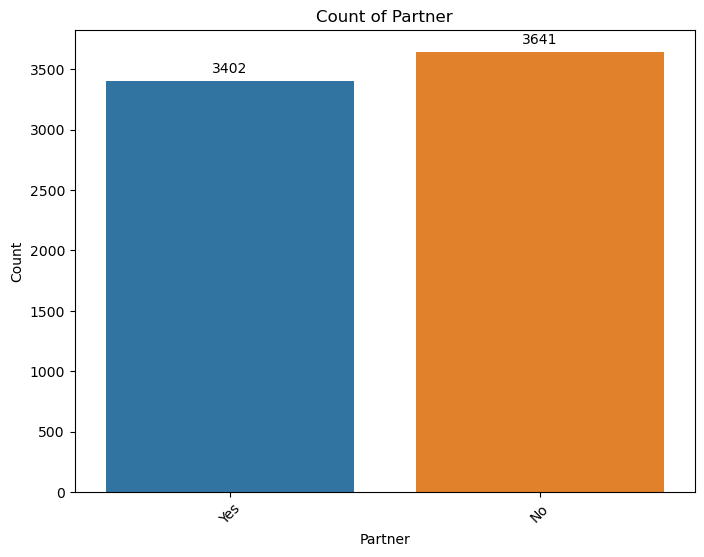

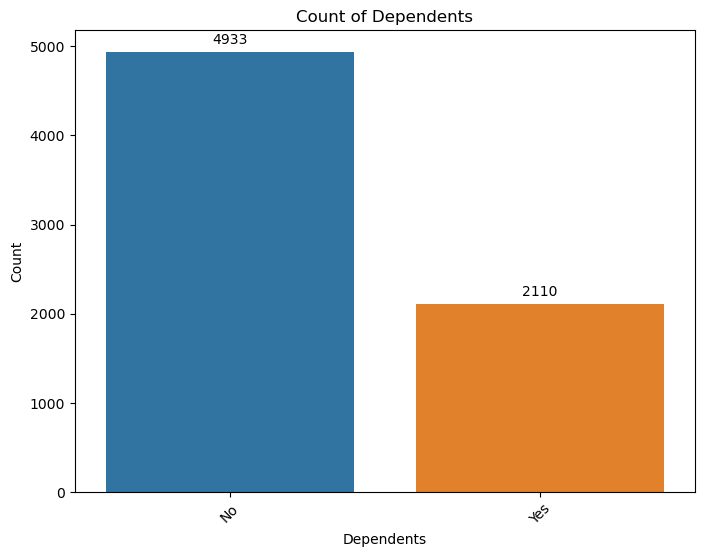

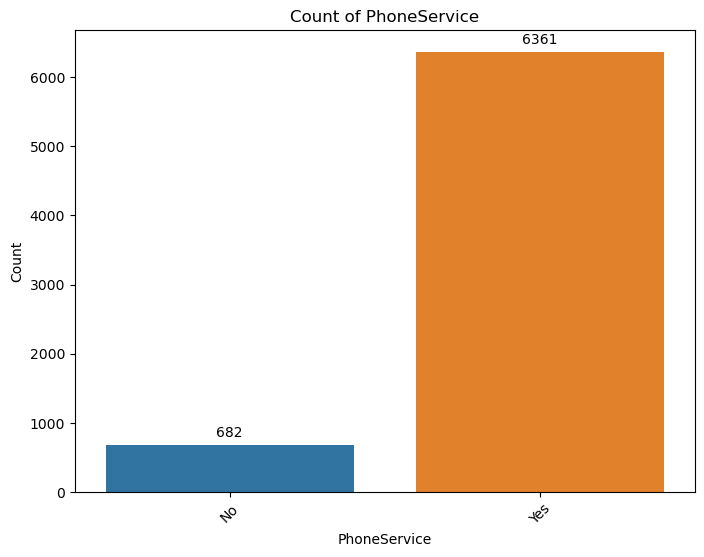

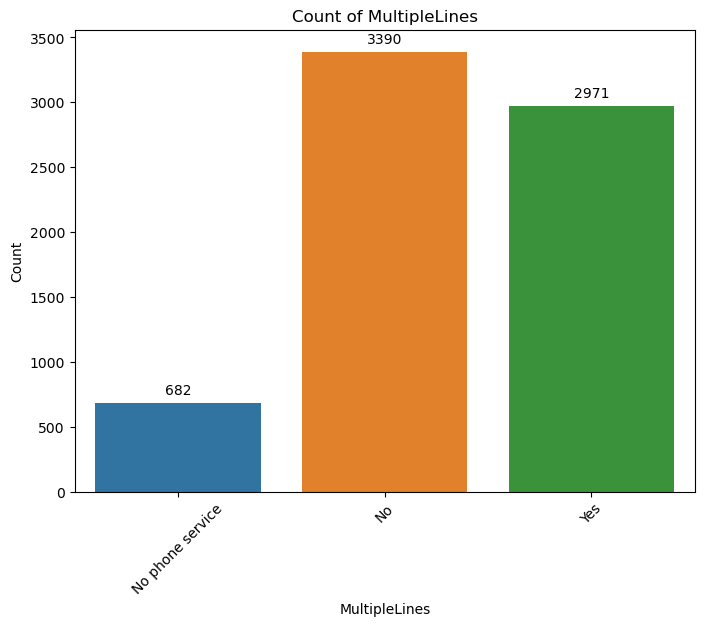

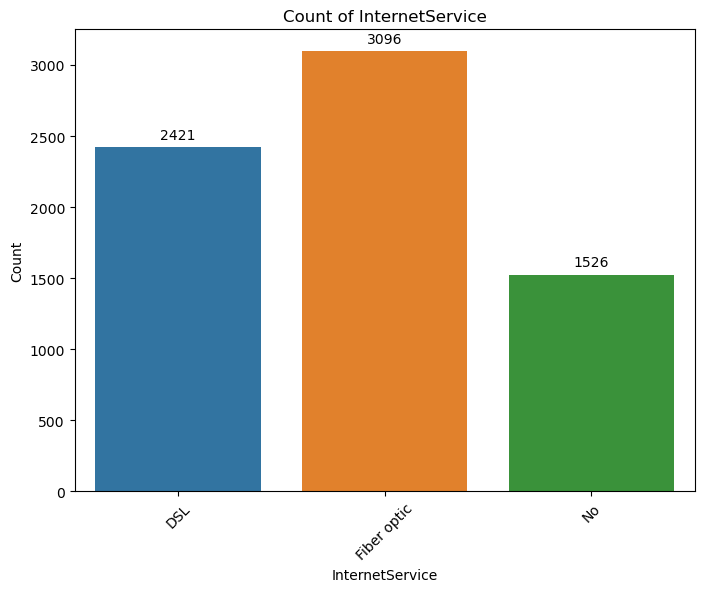

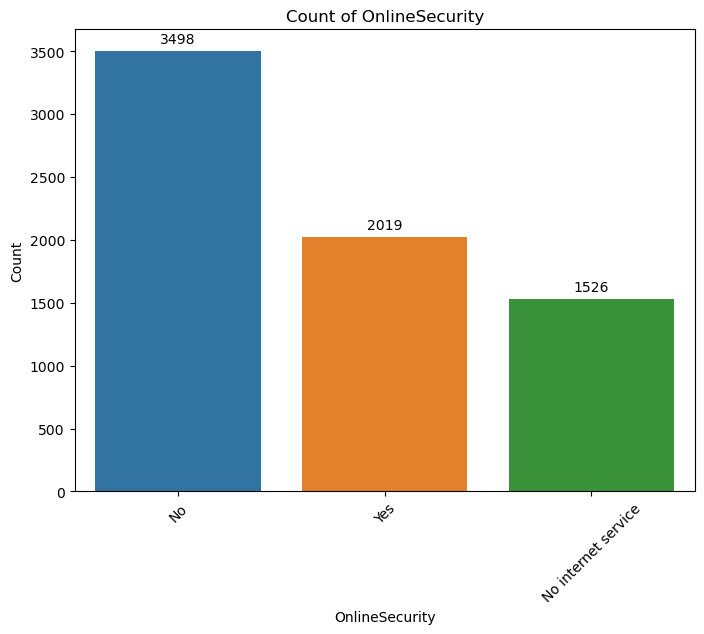

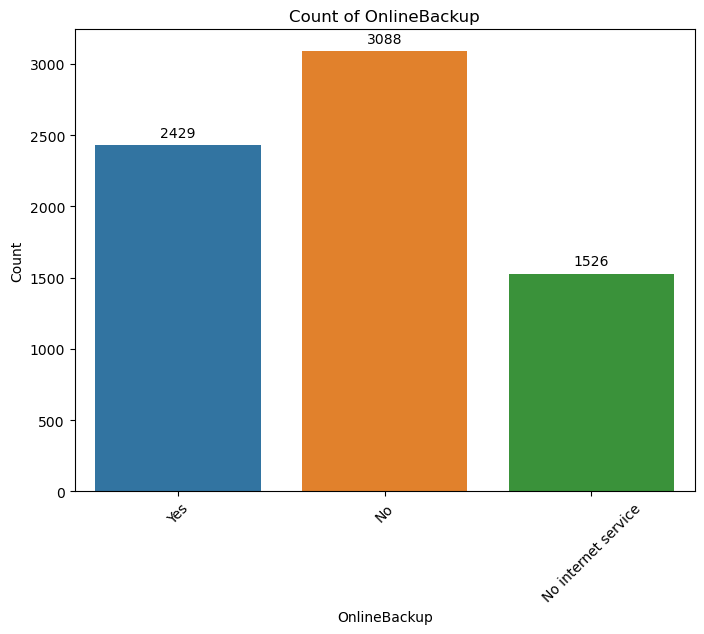

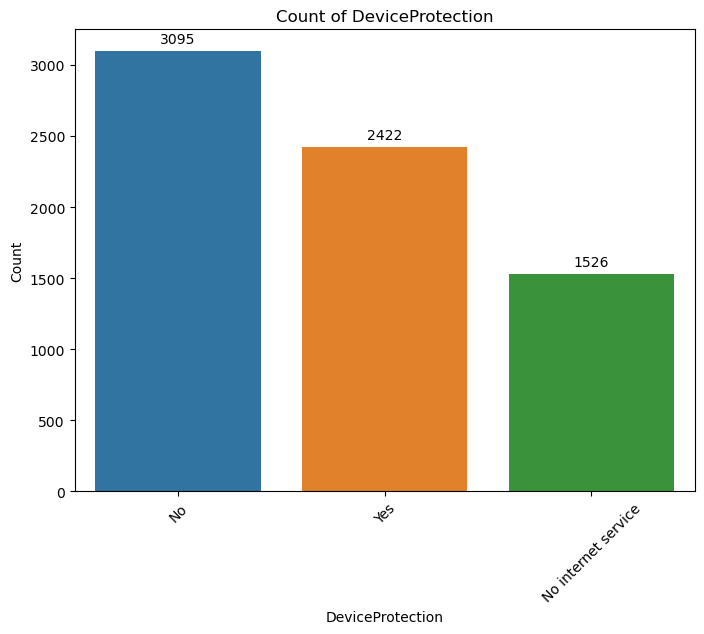

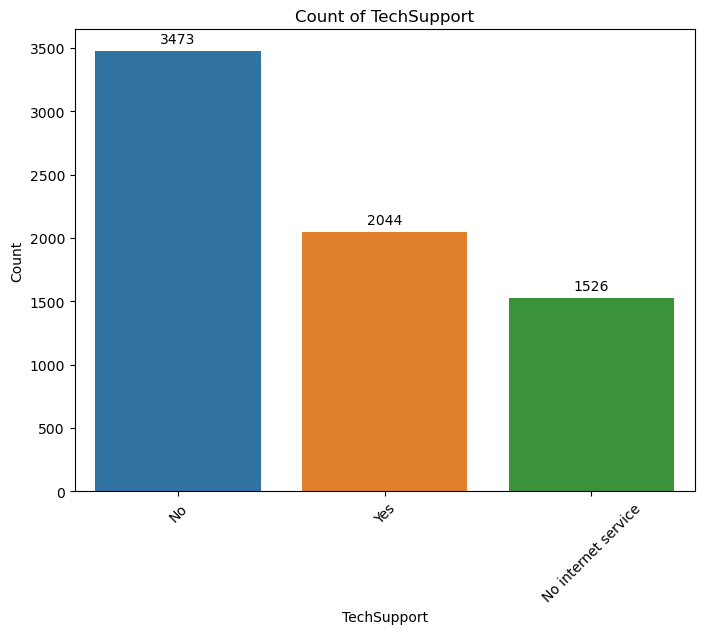

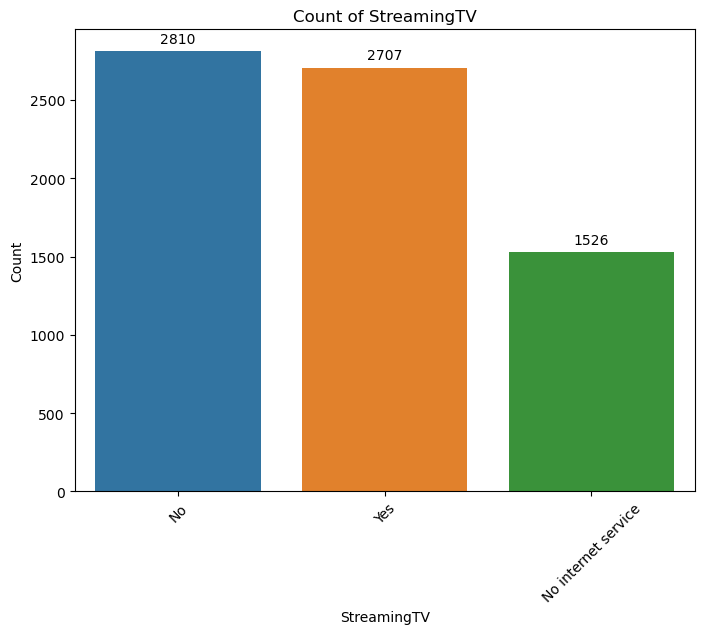

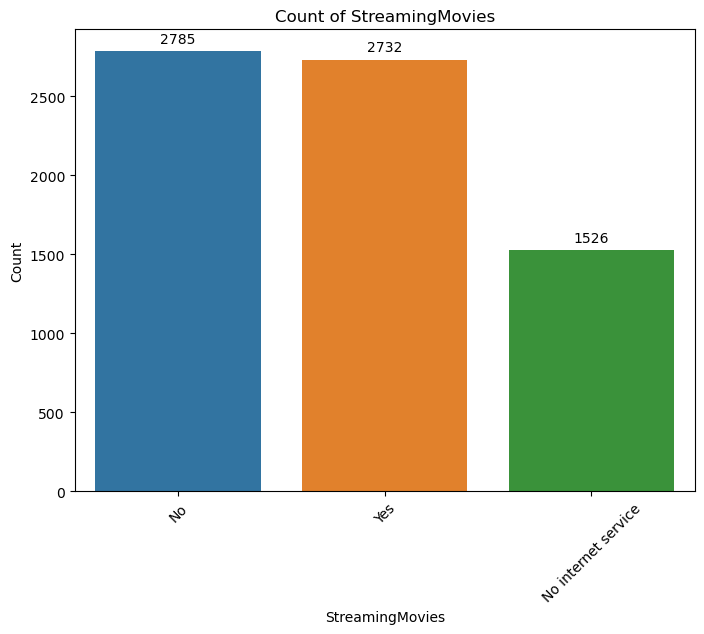

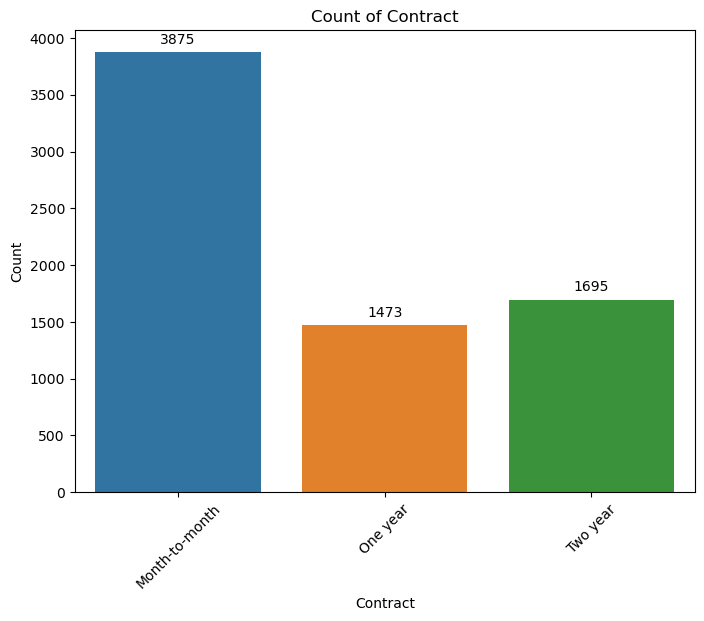

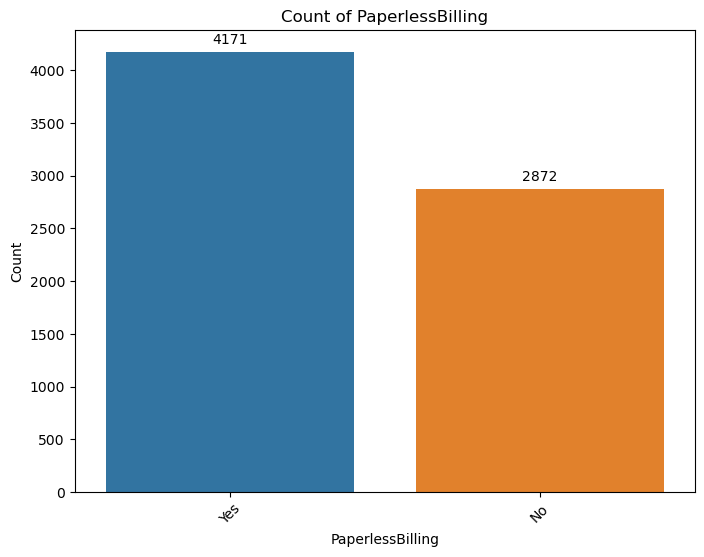

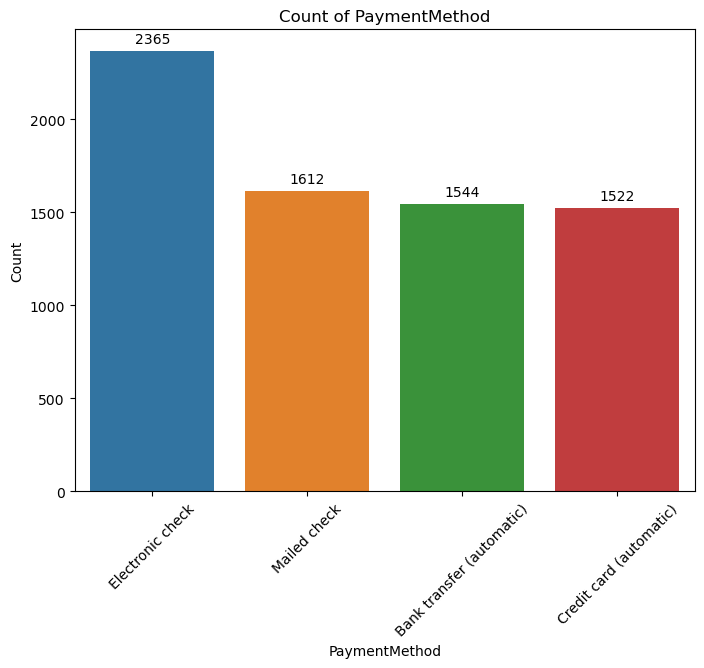

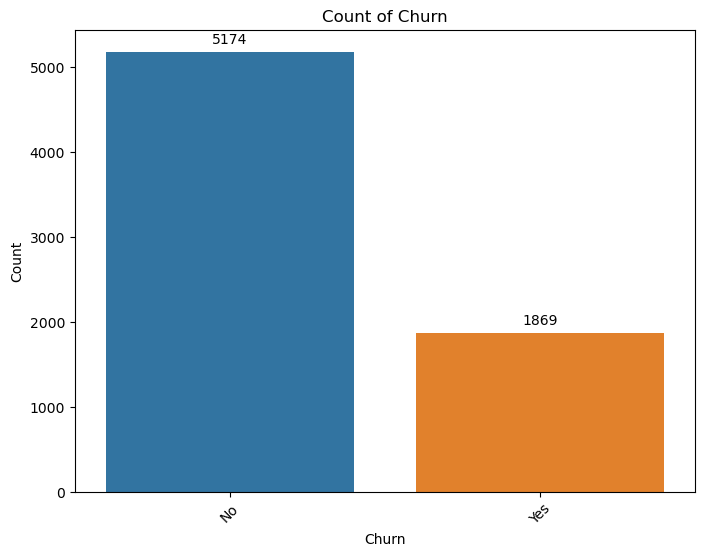

In [30]:
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Annotate count data labels on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), 'd'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.show()

## <b><font color = "teal">Histogram & Distribution Curve</font></b>

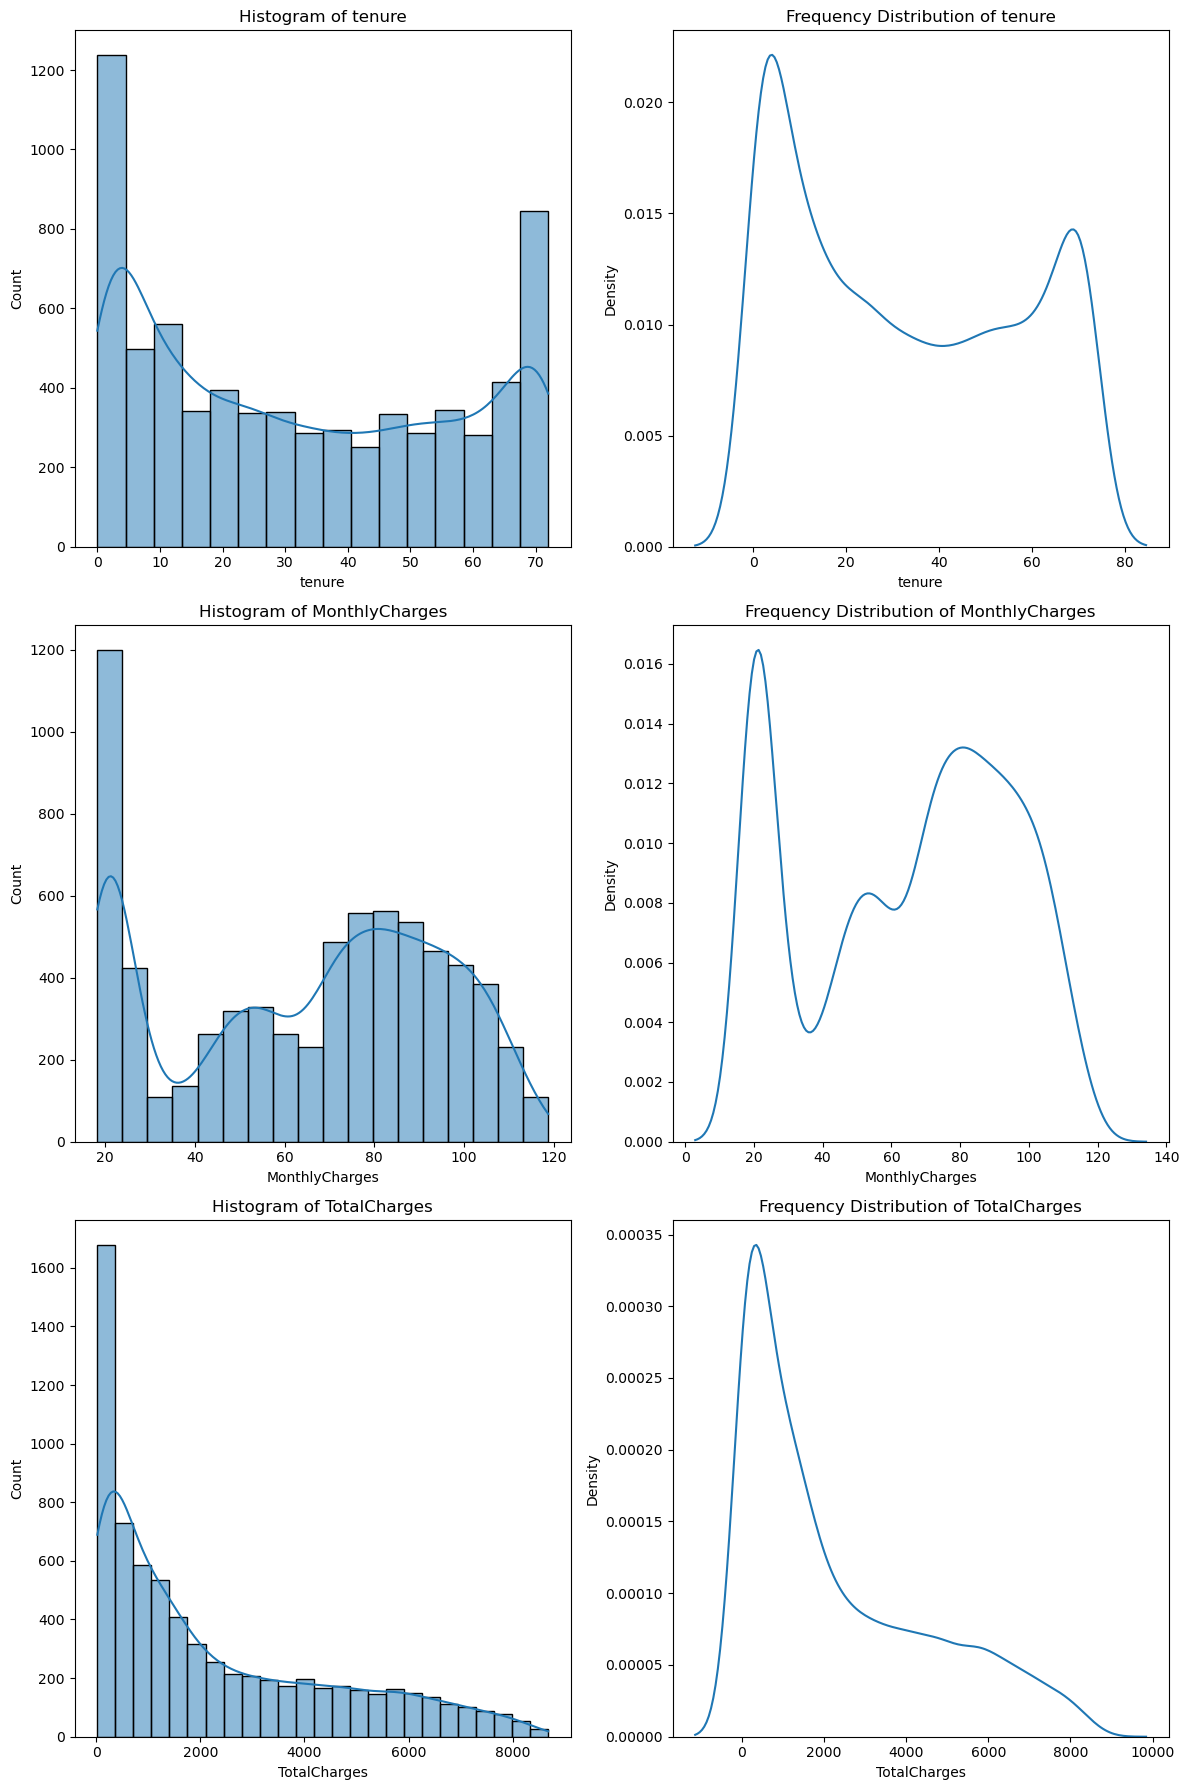

In [32]:
# defining the numerical data type attributes

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # select the numerical columns

# create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(12, 6*len(numerical_cols)))

# loop through each numerical column
for i, col in enumerate(numerical_cols):
    # histogram
    sns.histplot(df[col], ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f"Histogram of {col}")
    
    # frequency distribution
    sns.kdeplot(df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f"Frequency Distribution of {col}")

plt.tight_layout()
plt.show()

##### <font color ="blue">We can conclude the following after watching the distribution curve of tenure.</font>
1. 1. High Frequency at Low Charges: The highest frequency, just over 1000, is for the lowest monthly charge range (0-20). This suggests that a significant number of customers are paying lower monthly charges.
2. Multiple Peaks: There are several peaks at different charge ranges, indicating that there are multiple common monthly charge amounts.
3. Fluctuating Distribution: The distribution is not symmetrical. After the initial high peak, the frequency fluctuates across different charge ranges.


##### <font color ="blue">We can conclude the following after watching the distribution curve of Monthly Charges.</font>
1. The distribution curve shows that the majority of customers have monthly charges between 50 and 100.
2. There is a peak around 20 which suggests a high concentration of customers at that price point which might be due to the presence of a significant number of customers who are on a basic plan or have a limited number of services.
3. The distribution is skewed to the right, suggesting that there are fewer customers with high monthly charges
4. The distribution curve has a bimodal shape, with two peaks. This is indicative of two distinct groups of customers with different monthly charges.

##### <font color ="blue">We can conclude the following after watching the distribution curve of Total Charges.</font>
1. The distribution curve is skewed to the right (positively skewed). It suggests that most of the total charges are concentrated in the lower range, with a smaller number of customers having very high total charges.
2.  It also shows a long tail extending towards the higher total charge values, indicating that there are a significant number of customers with very high total charges.

## <b><font color = "teal">Scatter Plot</font></b>

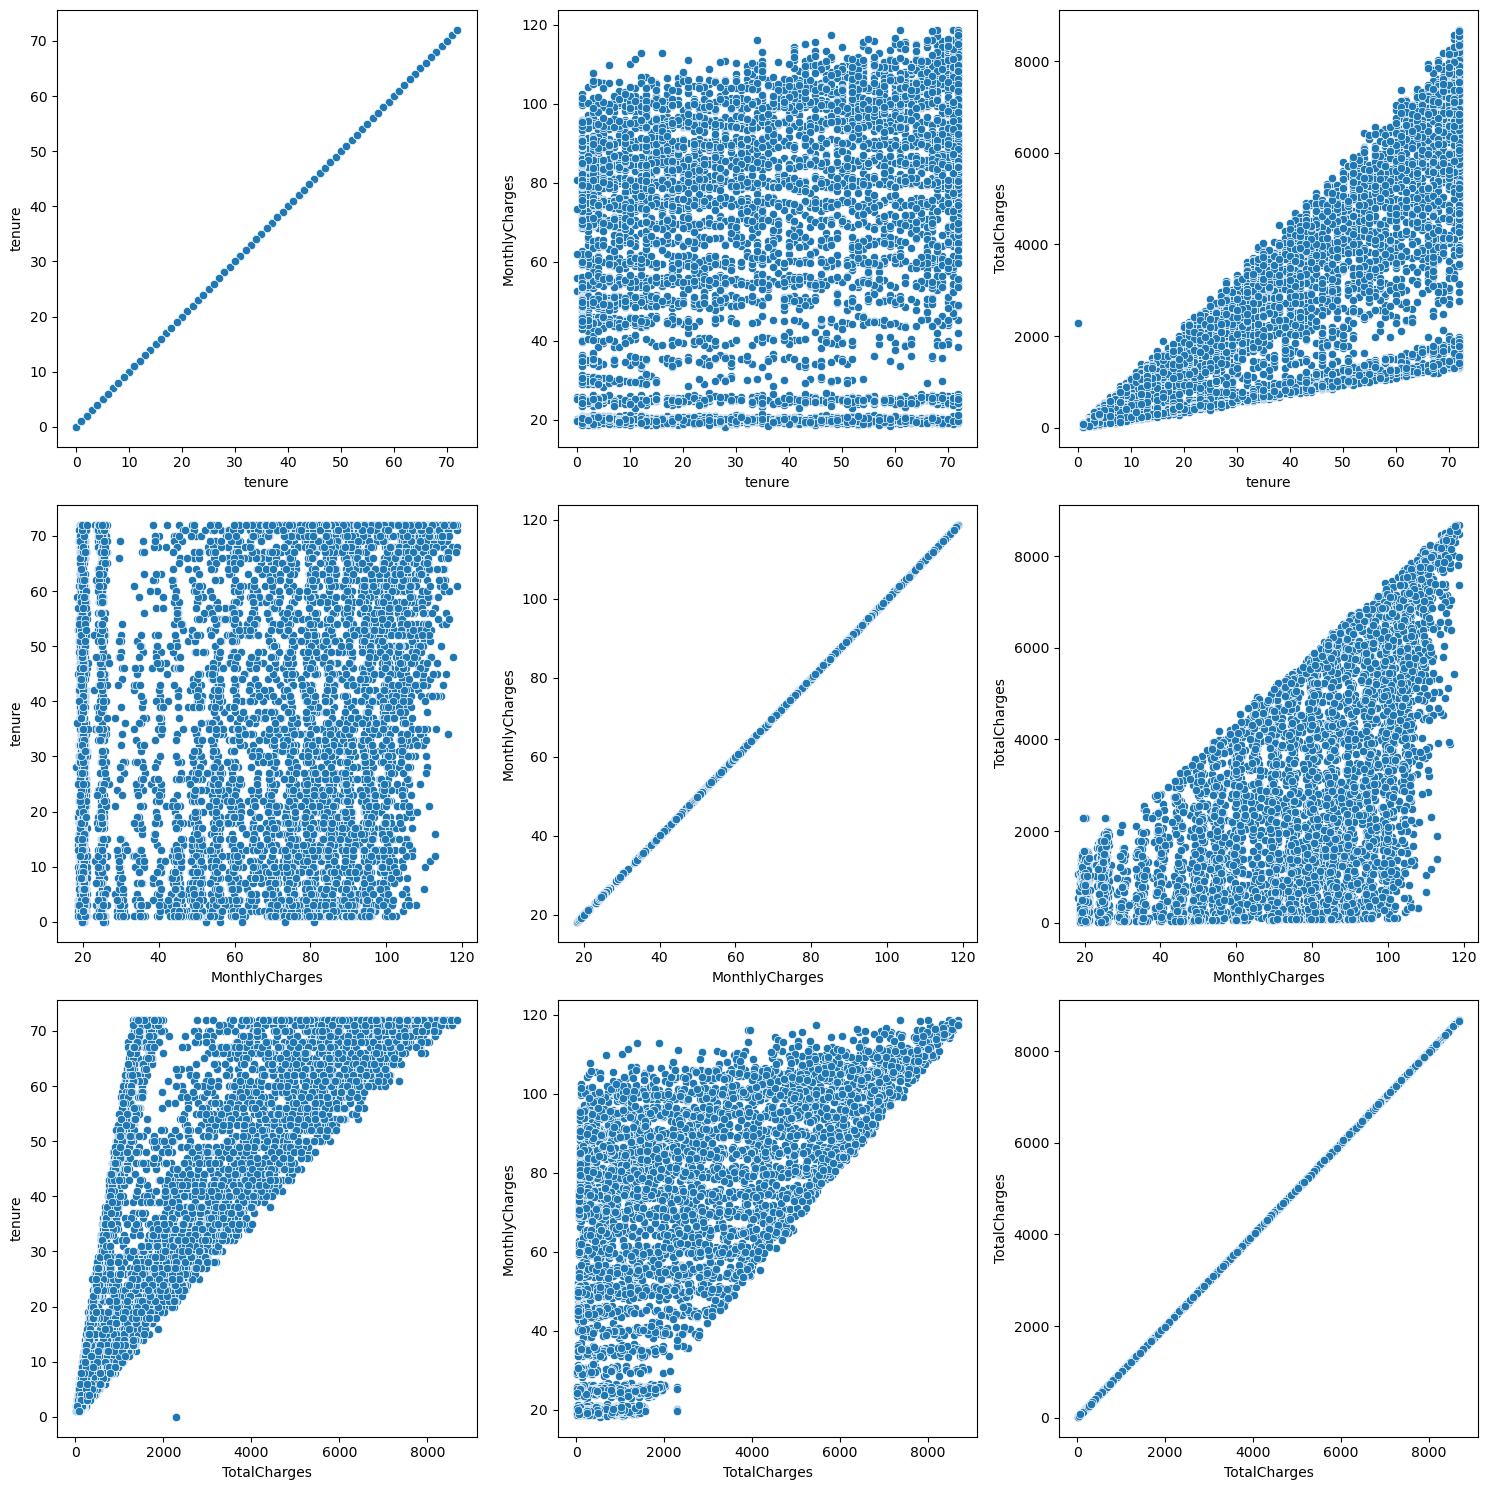

In [35]:
# Select the numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a figure and axis object
fig, axs = plt.subplots(nrows=len(numerical_cols), ncols=len(numerical_cols), figsize=(15, 15))

# Loop through each numerical column
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        # Create a scatterplot for each pair of numerical columns
        sns.scatterplot(x=col1, y=col2, data=df, ax=axs[i, j])
        axs[i, j].set_xlabel(col1)
        axs[i, j].set_ylabel(col2)

# Show the plot
plt.tight_layout()
plt.show()

##### <font color = "Blue">Tenure vs. Monthly Charges</font>
1. The points are densely scattered throughout the plot area without a clear trend or pattern.
2. This suggests that there is no strong relationship between tenure and monthly charges. Customers with varying tenures seem to have a wide range of monthly charges.
##### <font color = "Blue">Tenure vs. Total Charges</font>
1. There is a clear positive trend where total charges increase as tenure increases.
2. The points form a triangular shape starting near the origin and spreading out as tenure grows, indicating that customers with longer tenures tend to accumulate higher total charges.
##### <font color = "Blue">Monthly Charges vs. Total Charges</font>
1. There is a clear positive correlation between “MonthlyCharges” and “TotalCharges.” As “MonthlyCharges” increase, “TotalCharges” also tend to increase.
2. The data points are more densely packed at the lower end of “MonthlyCharges,” indicating that many customers have lower monthly charges.
3. The points form a triangular shape, starting near the origin and spreading out as “MonthlyCharges” increase. This suggests that while higher monthly charges lead to higher total charges, there is a wide range of total charges for higher monthly charges.

## <b><font color = "teal">Quantile Plot</font></b>

##### <font color ="blue">Lets begin by looking at the quantile plot of all the 3 numerical variables.</font>

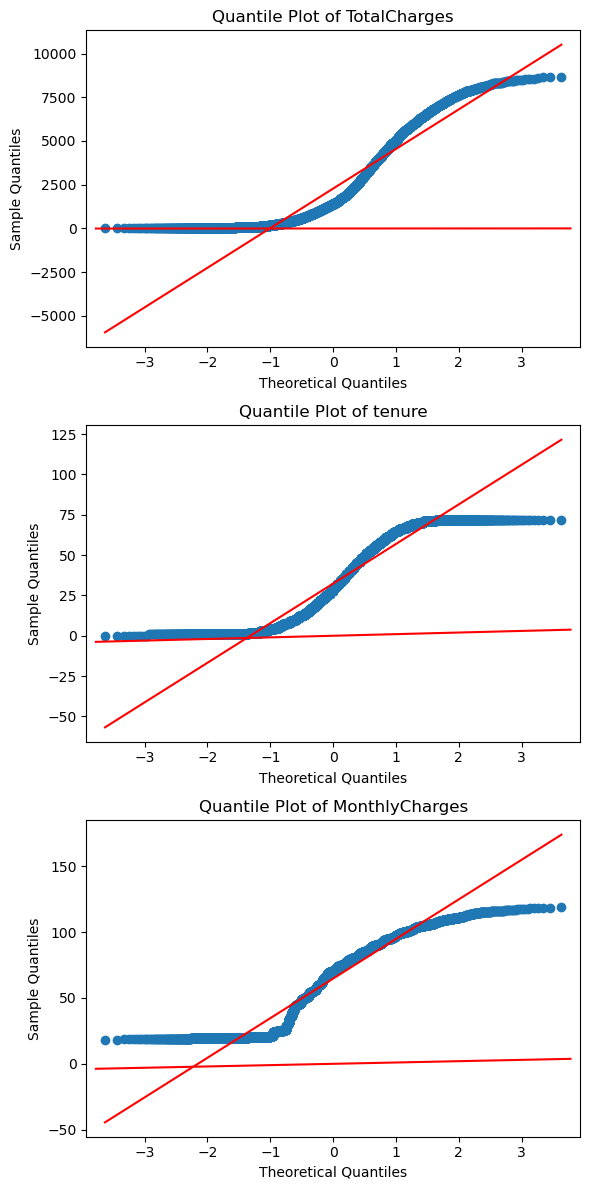

In [39]:
numerical_cols = ['TotalCharges', 'tenure', 'MonthlyCharges']  # select the numerical columns

# create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(6, 4*len(numerical_cols)))

# loop through each numerical column
for i, col in enumerate(numerical_cols):
    # quantile plot
    sm.qqplot(df[col], ax=axs[i], line='s')
    axs[i].set_title(f"Quantile Plot of {col}")
    
    # add 45 degree line in red color
    x = np.linspace(axs[i].get_xlim()[0], axs[i].get_xlim()[1], 2)
    axs[i].plot(x, x, 'r-')

plt.tight_layout()
plt.show()

## <font color = "teal">Q-Q plot between Senior & Non-senior Citizen considering all the 3 numerical variables</font>

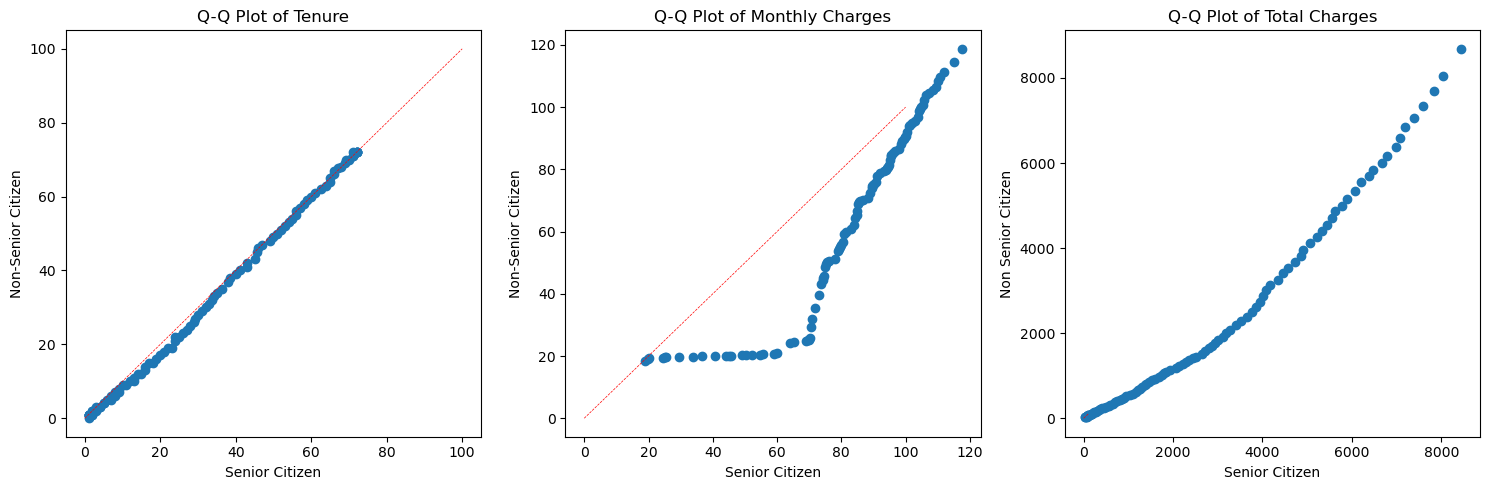

In [41]:
# 

senior_tenure = df[df['SeniorCitizen']==1]['tenure']
nonsenior_tenure = df[df['SeniorCitizen']==0]['tenure']

senior_monthly_charges = df[df['SeniorCitizen']==1]['MonthlyCharges']
nonsenior_monthly_charges = df[df['SeniorCitizen']==0]['MonthlyCharges']

senior_total_charges = df[df['SeniorCitizen']==1]['TotalCharges']
nonsenior_total_charges = df[df['SeniorCitizen']==0]['TotalCharges']

# Create Q-Q plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(np.quantile(senior_tenure, np.linspace(0, 1, 100)), np.quantile(nonsenior_tenure, np.linspace(0, 1, 100)), 'o')
plt.plot([0, 100], [0, 100], 'r--', linewidth=0.5)  # 45-degree line in red
plt.title("Q-Q Plot of Tenure")
plt.xlabel("Senior Citizen")
plt.ylabel("Non-Senior Citizen")

plt.subplot(1, 3, 2)
plt.plot(np.quantile(senior_monthly_charges, np.linspace(0, 1, 100)), np.quantile(nonsenior_monthly_charges, np.linspace(0, 1, 100)), 'o')
plt.plot([0, 100], [0, 100], 'r--', linewidth=0.5)  # 45-degree line in red
plt.title("Q-Q Plot of Monthly Charges")
plt.xlabel("Senior Citizen")
plt.ylabel("Non-Senior Citizen")

plt.subplot(1, 3, 3)
plt.plot(np.quantile(senior_total_charges, np.linspace(0, 1, 100)), np.quantile(nonsenior_total_charges, np.linspace(0, 1, 100)), 'o')
plt.plot([0, 100], [0, 100], 'r--', linewidth=0.5)  # 45-degree line in red
plt.title("Q-Q Plot of Total Charges")
plt.xlabel("Senior Citizen")
plt.ylabel("Non Senior Citizen")

plt.tight_layout()
plt.show()

### <font color = "Blue">Following observation can be made by the above Q-Q plot.</font>
1. The Q-Q plots show that the data for Tenure and Total Charges follow a normal distribution.
2. The data for Monthly Charges does not follow a normal distribution. This is because the points are not all along the line. The points at the higher end of the distribution are not aligned with the line, suggesting that the distribution is skewed to the right.

## <font color = "teal">Heat Map</font>

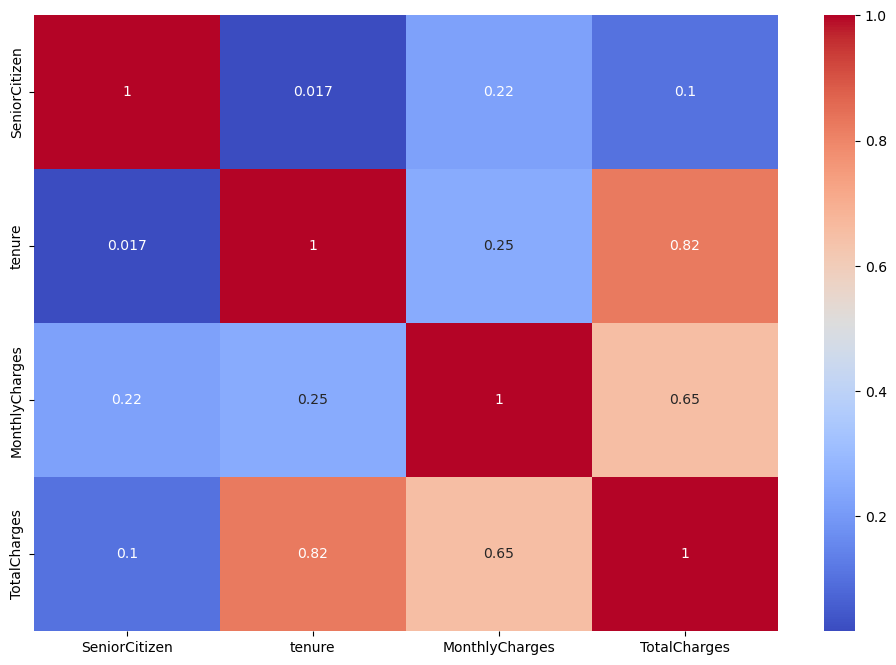

In [81]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## <font color = "Red">Task 3: Try to find which type of customers are more likely to churn.</font>

## <font color = "teal">Churn Rate by Categorical Variable</font>

##### <font color ="Blue">Let's look at the churn rate by each categorical variable in percentage terms to understand which type of customers are more likely to churn.</font>

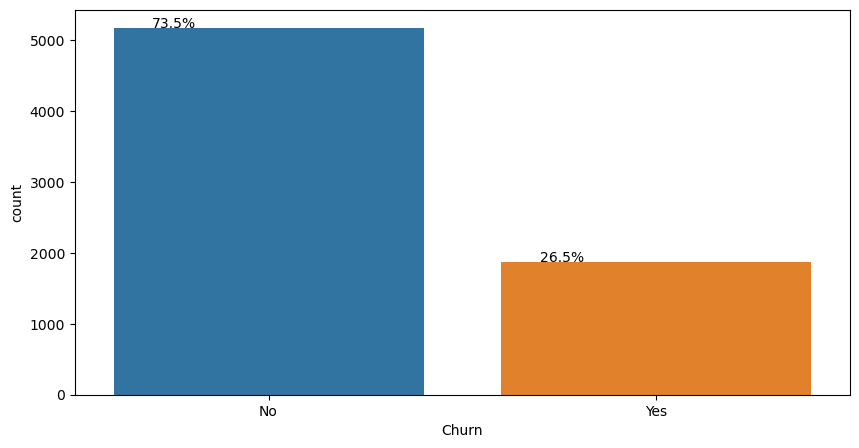

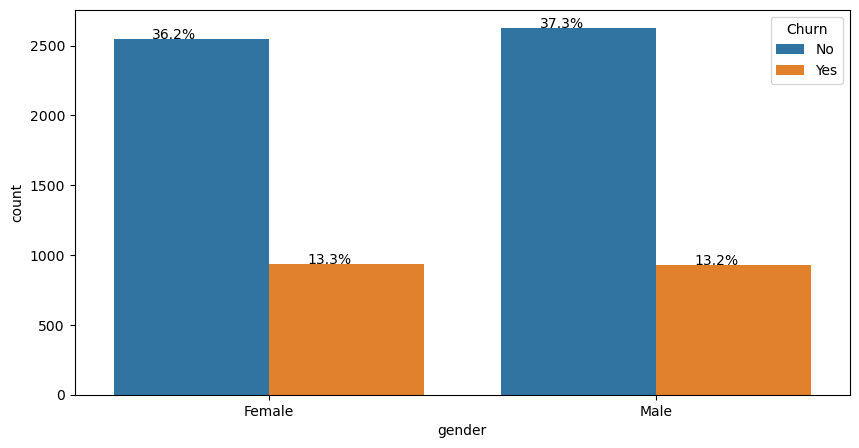

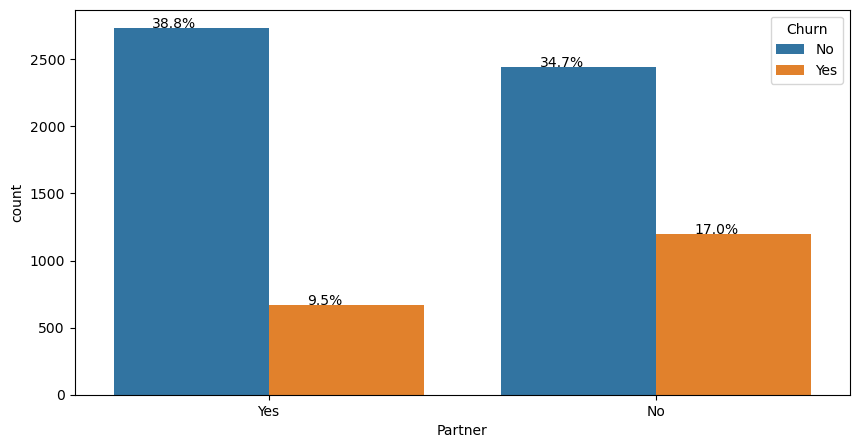

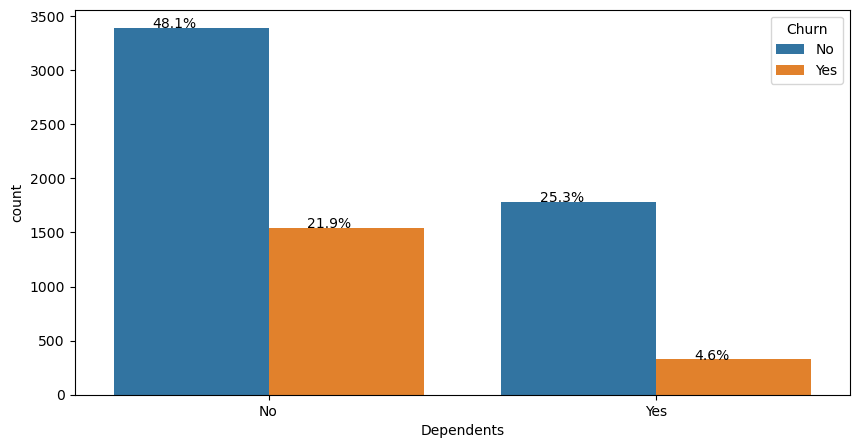

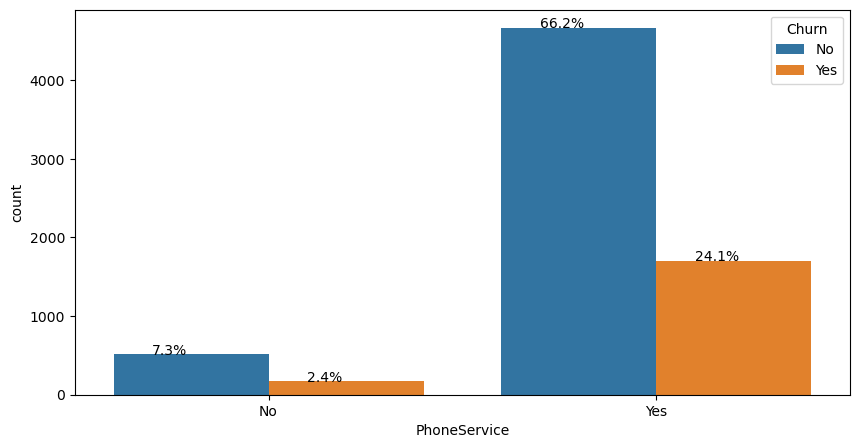

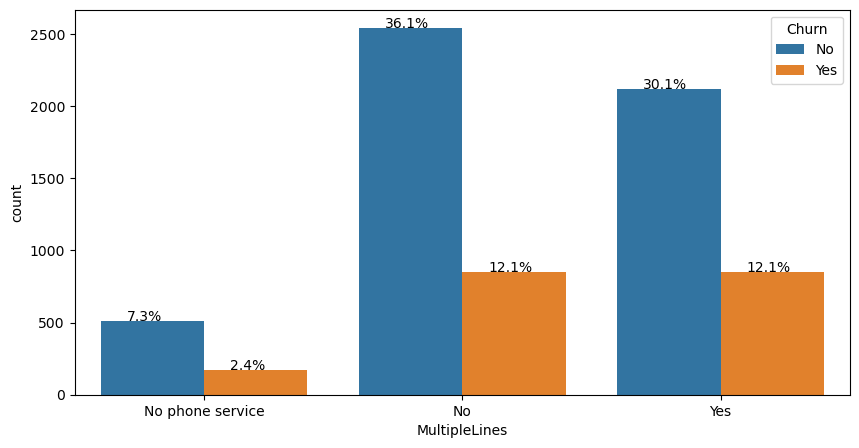

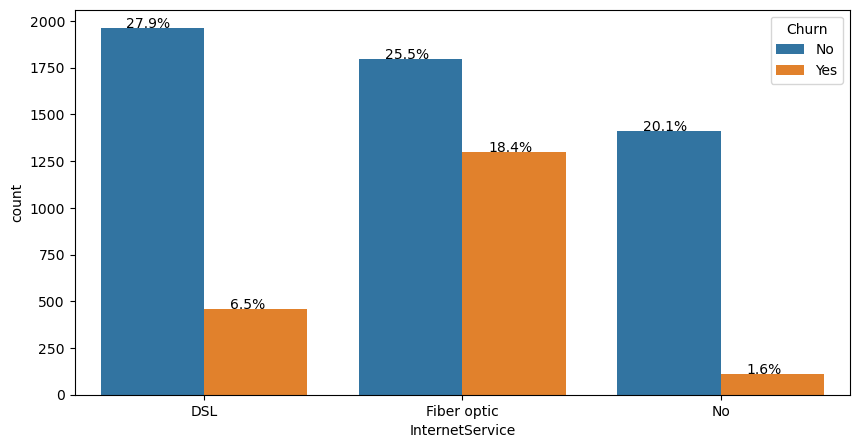

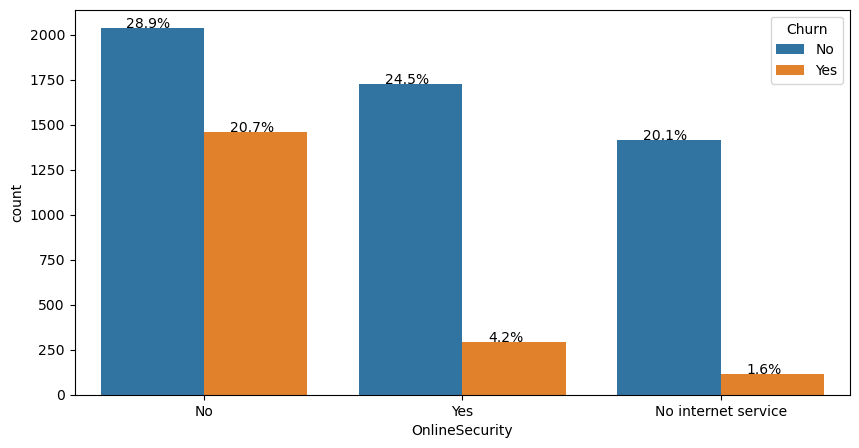

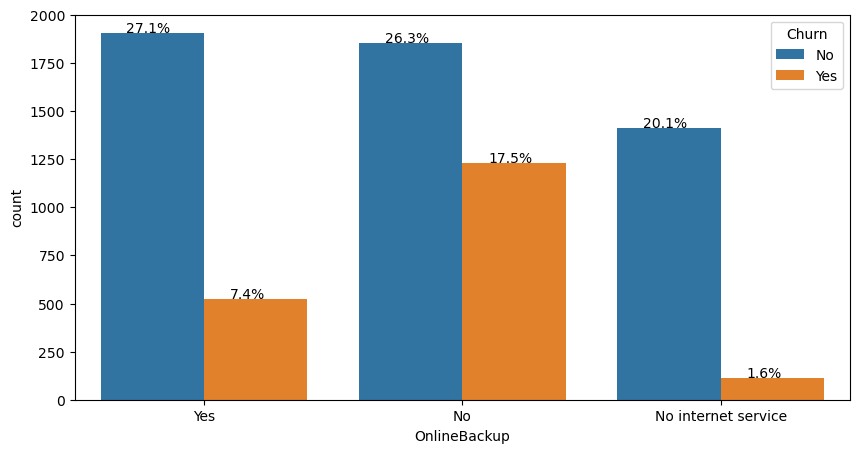

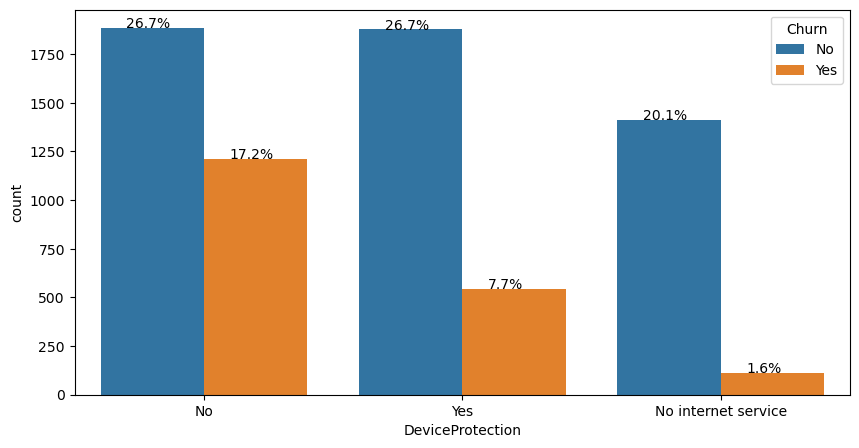

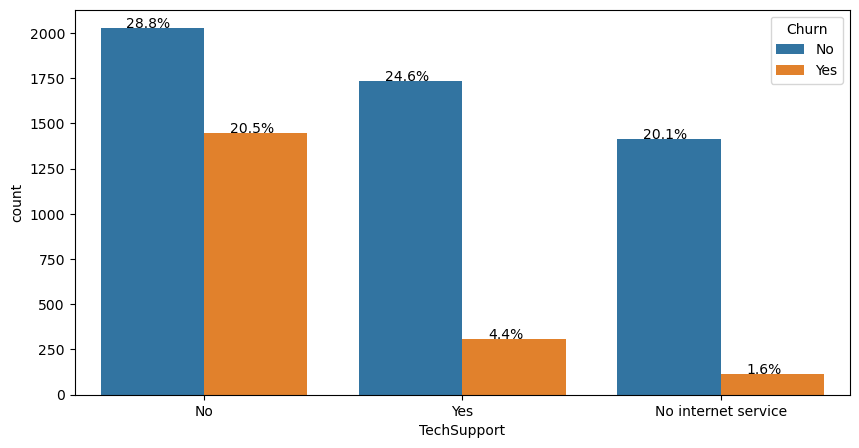

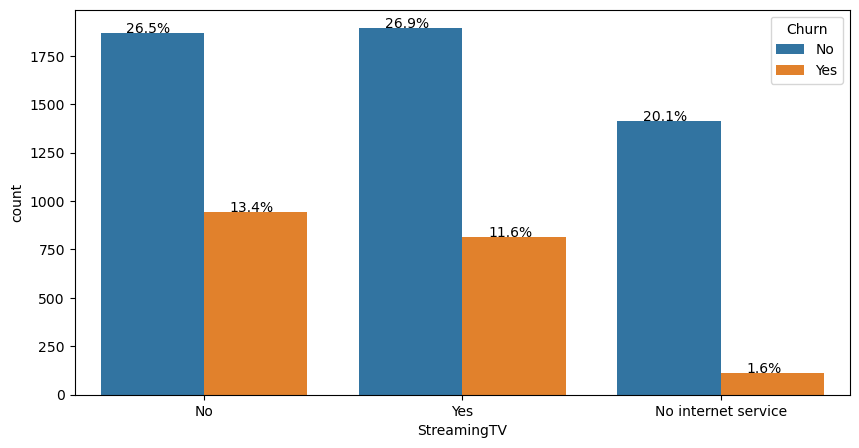

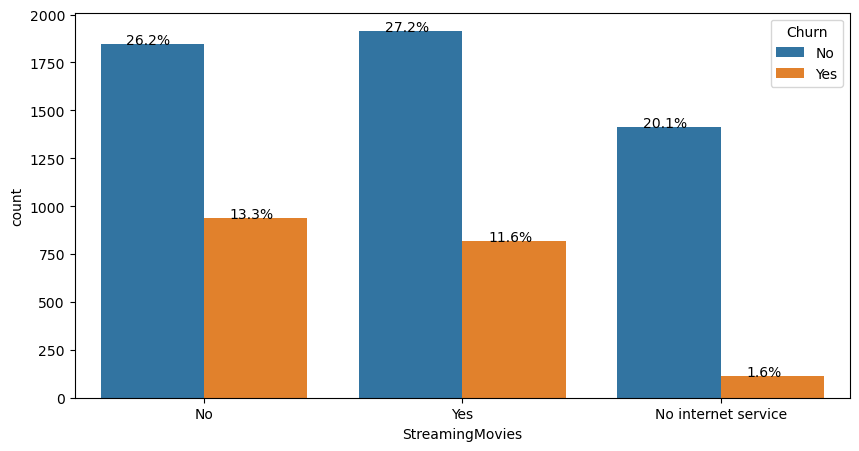

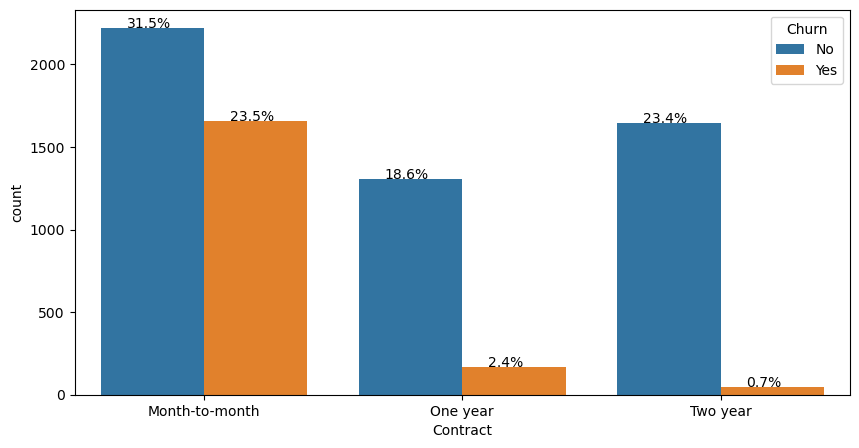

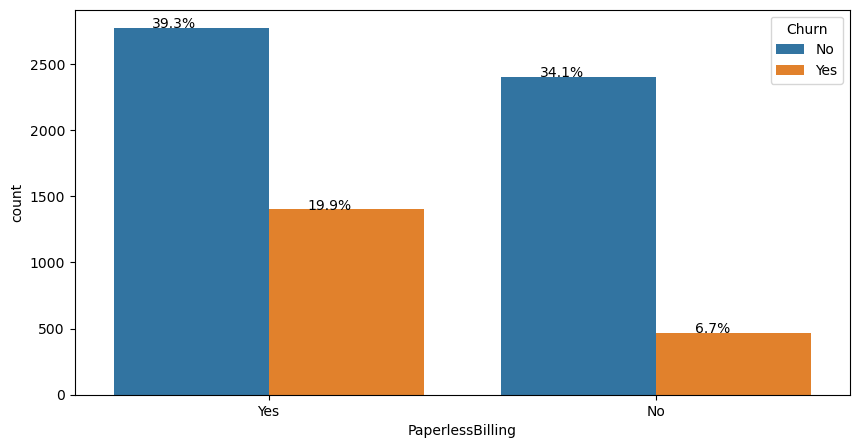

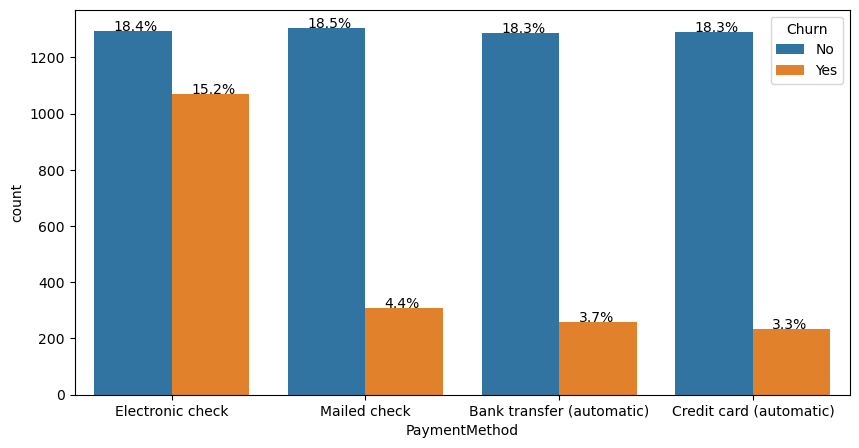

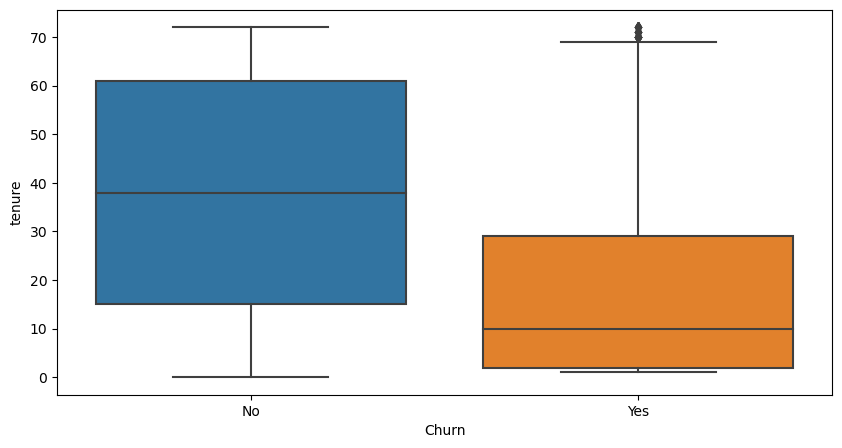

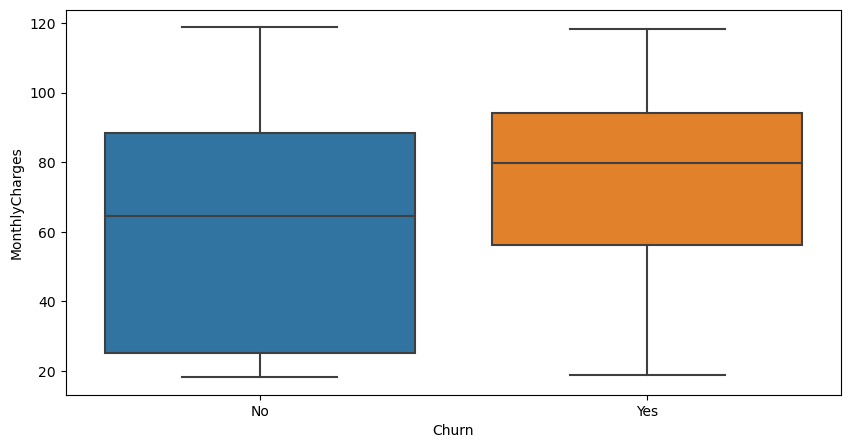

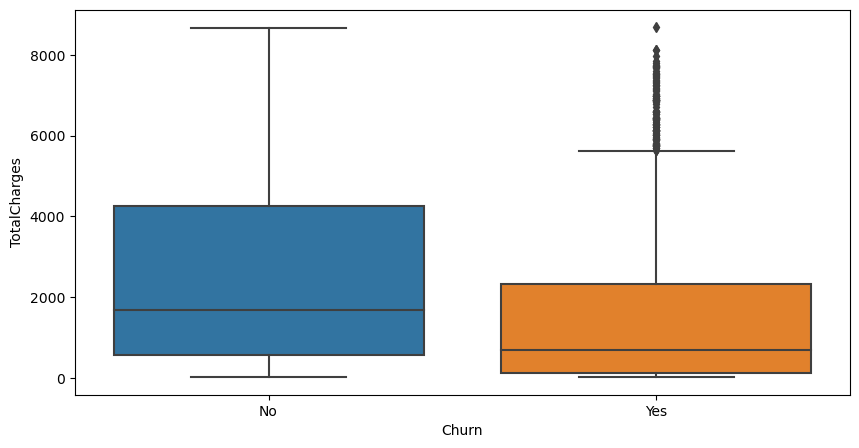

In [90]:
# Count plot of Churn
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Churn', ax=ax)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(percentage, (p.get_x() + 0.1, p.get_height() + 1))
plt.show()

# Churn rate by categorical variables
for column in df.select_dtypes(include=['object']).columns:
    if column!= 'Churn' and column!= 'customerID':
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.countplot(data=df, x=column, hue='Churn', ax=ax)
        total = len(df)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            ax.annotate(percentage, (p.get_x() + 0.1, p.get_height() + 1))
        plt.show()

# Boxplot of numerical variables by Churn
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(data=df, x='Churn', y=column, ax=ax)
    plt.show()

### <font color = "Blue">Let us try to interpret the bar graph with respect to each categorical variable</font>
1. The overall churn rate is 26.5% which is a significant number for the dataset which is roughly 1 in 4 customers.
2. <b>Gender:</b> The overall churn rate for female as well as male is almost equal and evenly distributed, indicating no significant difference in churn rates between females and males.
3. <b>Partner:</b> If we look at the partner attribute, the overall sample has even distribution between customers having a partner and who do not have a partner. The graph suggests that having a partner may be linked to a lower likelihood of churn.
4. <b>Dependents:</b> The customer who do not have dependents are more likely to churn as compared to customers who have dependents. However there is still a notable percentage that did.
5. <b>Phone Services:</b> The graph shows the distribution of churned and non-churned customers based on whether or not they have phone service. 66.2% of customers who have phone service do not churn, while 24.1% do. On the other hand, only 7.3% of customers who do not have phone service churn, while 2.4% do not. Overall, the graph suggests that customers with phone service are more likely to churn than those without.
6. <b>Internet Services</b> Customers internet services are more likely to churn compared to customers with no internet service. This suggests that the company should focus on improving customer satisfaction for customers with these internet services to reduce churn rate. The same pattern is repeated when we look at the OnlineSecurity, OnlineBackup, DeviceProtection, and Tech Support attributes. We can safely assume that the customers who have access to these services must have the access to internet. Therefore, the company should focus on improving the internet based services to stop the customers from churning.
7. <b>Contract</b> Contract is another important variable for any customer. Month-to-month contracts have the highest churn rate (23.5%). This is likely due to the lack of commitment, making it easy for customers to switch to a different service. Two-year contracts have the lowest churn rate (0.7%). This is because customers are more committed to the service and might face a penalty for leaving early. To reduce churn rate, the company can consider offering longer contract terms with incentives or discounts.
8. <b>Payment Method:</b> Almost 60% of the customers who churned made payment with Electronic check which indicates the process may not be very user friendly. Company needs to work on this aspect as well.